<font color="#a8e7f7">IMPORTING

In [41]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
pulsar = pd.read_csv("C:/Users/e u n o i a/Downloads/archive(1)/pulsar_data_train.csv")

<font color="#a8e7f7">DATA ANALYSIS

In [4]:
pulsar

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [36]:
pulsar.shape

(9273, 9)

In [37]:
pulsar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9273 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                9273 non-null   float64
 1    Standard deviation of the integrated profile  9273 non-null   float64
 2    Excess kurtosis of the integrated profile     9273 non-null   float64
 3    Skewness of the integrated profile            9273 non-null   float64
 4    Mean of the DM-SNR curve                      9273 non-null   float64
 5    Standard deviation of the DM-SNR curve        9273 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           9273 non-null   float64
 7    Skewness of the DM-SNR curve                  9273 non-null   float64
 8   target_class                                   9273 non-null   float64
dtypes: float64(9)
memory usage: 724.5 KB


In [38]:
pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000,9273.000000
mean,111.133750,46.514053,0.479546,1.790673,12.735359,26.327860,8.327933,105.783345,0.091664
std,25.686405,6.781320,1.071155,6.286567,29.766782,19.542634,4.549914,108.166669,0.288567
min,6.187500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-2.636857,-1.976976,0.000000
25%,100.984375,42.398382,0.024497,-0.188021,1.910535,14.376641,5.788817,34.917943,0.000000
50%,115.234375,46.895026,0.223858,0.202884,2.797659,18.435186,8.427475,83.151969,0.000000
75%,127.328125,51.001785,0.472066,0.930710,5.459866,28.387019,10.721934,139.770330,0.000000
max,189.734375,91.808628,8.069522,68.101622,211.948997,110.642211,34.539844,1191.000837,1.000000


In [5]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
pulsar.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

<font color="#a8e7f7">DATA VISUALISATION

<AxesSubplot:xlabel='target_class', ylabel='count'>

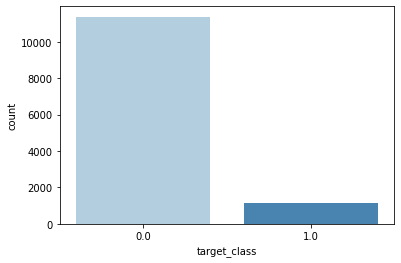

In [7]:
sns.countplot(x=pulsar["target_class"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Mean of the integrated profile'>

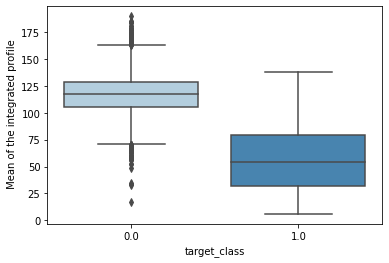

In [8]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Mean of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Standard deviation of the integrated profile'>

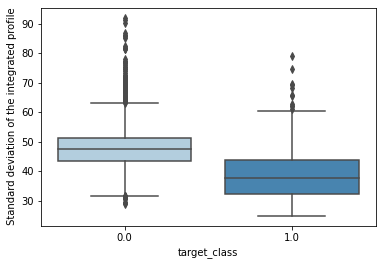

In [9]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Standard deviation of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Excess kurtosis of the integrated profile'>

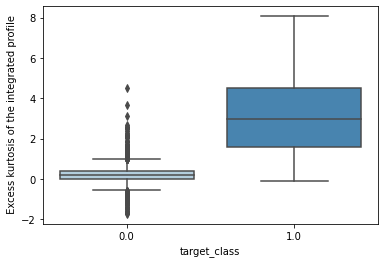

In [10]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Excess kurtosis of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Skewness of the integrated profile'>

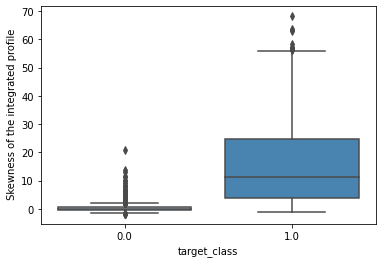

In [11]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Skewness of the integrated profile"], palette="Blues")

<AxesSubplot:xlabel='target_class', ylabel=' Mean of the DM-SNR curve'>

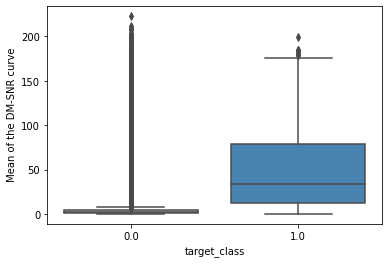

In [12]:
sns.boxplot(x=pulsar["target_class"], y=pulsar[" Mean of the DM-SNR curve"], palette="Blues")

<font color="#a8e7f7">TRAINING THE MODEL

In [13]:
pulsar=pulsar.dropna()
array = pulsar.values
X = array[:,0:8]
Y = array[:,8]
X=X.astype('float')

In [33]:
validation_size = 0.015
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [34]:
mod = KNeighborsClassifier()
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)
pred

array([1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0.])

<font color="#a8e7f7">CLASSIFICATION REPORT

In [35]:
report = classification_report(Y_test,pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       126
         1.0       1.00      0.93      0.96        14

    accuracy                           0.99       140
   macro avg       1.00      0.96      0.98       140
weighted avg       0.99      0.99      0.99       140



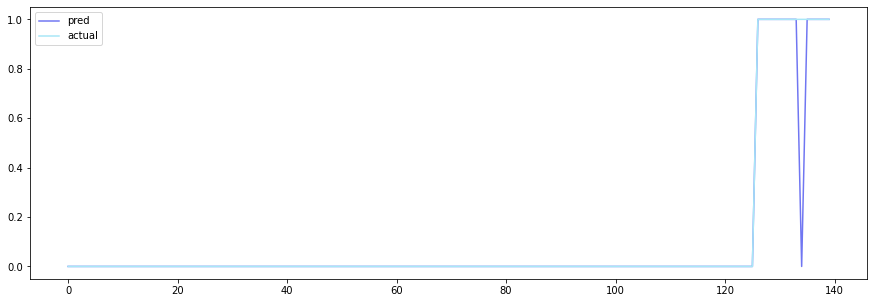

In [44]:
preds = pd.DataFrame({'y_pred': pred, 'y_test':Y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

plt.figure(figsize=(15, 5))
plt.plot(preds['y_pred'], label='pred', color="#7076f2")
plt.plot(preds['y_test'], label='actual', color="#a8e7f7")
plt.legend()
plt.show()